In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
api_token = {"username":"jadidjadid","key":"cc2f93d44fed31a440bca9deda774e1d"}
import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d andrewmvd/lung-and-colon-cancer-histopathological-images

100% 1.76G/1.76G [00:12<00:00, 96.5MB/s]



In [5]:
!unzip lung-and-colon-cancer-histopathological-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc10.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc100.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1000.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1001.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1002.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1003.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1004.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1005.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1006.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1007.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1008.jpeg  
  inflating: lung_c

In [6]:
colon_aca_dataset = "/content/lung_colon_image_set/colon_image_sets/colon_aca"
os.makedirs('/content/model_cell_images/train/colon_aca') 
os.makedirs('/content/model_cell_images/validation/colon_aca')




colon_n_dataset = "/content/lung_colon_image_set/colon_image_sets/colon_n"
os.makedirs('/content/model_cell_images/train/colon_n') 
os.makedirs('/content/model_cell_images/validation/colon_n')

In [7]:
import os
import shutil

colon_aca_train= "/content/model_cell_images/train/colon_aca"
colon_aca_validation= "/content/model_cell_images/validation/colon_aca"

filesun1 = os.listdir(colon_aca_dataset)

# train_len_func = lambda x: int(70/100*len(x)
# memindahkan 70% file
for file in filesun1[0:int(len(filesun1) * .7)]:
  new_path = shutil.move(f"{colon_aca_dataset}/{file}", colon_aca_train)
  
filesun2 = os.listdir(colon_aca_dataset)

# memmindahkan sisa(seluruh file)
for file in filesun2:
    new_path = shutil.move(f"{colon_aca_dataset}/{file}", colon_aca_validation)  

In [8]:


colon_n_train= "/content/model_cell_images/train/colon_n"
colon_n_validation= "/content/model_cell_images/validation/colon_n"

filespr1 = os.listdir(colon_n_dataset)

# train_len_func = lambda x: int(70/100*len(x)
# memindahkan 70% file
for file in filespr1[0:int(len(filespr1) * .7)]:
  new_path = shutil.move(f"{colon_n_dataset}/{file}", colon_n_train)
  
filespr2 = os.listdir(colon_n_dataset)

# memmindahkan sisa(seluruh file)
for file in filespr2:
    new_path = shutil.move(f"{colon_n_dataset}/{file}", colon_n_validation)  

In [9]:
base_dir = '/content/model_cell_images'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [11]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle

batch_size = 32
augmen_gen = ImageDataGenerator(rescale=1. / 255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

train_gen = augmen_gen.flow_from_directory(
    train_dir,
    class_mode = 'categorical',
    shuffle=True,
    target_size = (224,224),
    batch_size=batch_size,
    color_mode ='rgb'
)

val_gen = augmen_gen.flow_from_directory(
    validation_dir,
    class_mode = 'categorical',
    shuffle=True,
    target_size = (224,224),
    batch_size= batch_size,
    color_mode ='rgb'
)


Found 7000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


In [12]:
file_train_colon_n = os.listdir(colon_n_train)
file_Val_colon_n = os.listdir(colon_n_validation)
file_train_colon_aca = os.listdir(colon_aca_train)
file_Val_colon_aca = os.listdir(colon_aca_validation)

print("data colon_n train : " + str(len(file_train_colon_n)))
print("data colon_n validation : " + str(len(file_Val_colon_n)))
print("data colon_aca train : " + str(len(file_train_colon_aca)))
print("data colon_aca validation : " + str(len(file_Val_colon_aca)))

print()
print(os.listdir(colon_n_train)[:10])
print(os.listdir(colon_n_validation)[:10])
print(os.listdir(colon_aca_train)[:10])
print(os.listdir(colon_aca_validation)[:10])

data colon_n train : 3500
data colon_n validation : 1500
data colon_aca train : 3500
data colon_aca validation : 1500

['colonn568.jpeg', 'colonn2390.jpeg', 'colonn2246.jpeg', 'colonn769.jpeg', 'colonn482.jpeg', 'colonn4075.jpeg', 'colonn4982.jpeg', 'colonn4819.jpeg', 'colonn2919.jpeg', 'colonn29.jpeg']
['colonn3066.jpeg', 'colonn3775.jpeg', 'colonn4256.jpeg', 'colonn1079.jpeg', 'colonn1520.jpeg', 'colonn252.jpeg', 'colonn2313.jpeg', 'colonn2573.jpeg', 'colonn3706.jpeg', 'colonn4011.jpeg']
['colonca176.jpeg', 'colonca2502.jpeg', 'colonca3210.jpeg', 'colonca4509.jpeg', 'colonca1952.jpeg', 'colonca1059.jpeg', 'colonca4630.jpeg', 'colonca895.jpeg', 'colonca490.jpeg', 'colonca3077.jpeg']
['colonca695.jpeg', 'colonca1636.jpeg', 'colonca232.jpeg', 'colonca4855.jpeg', 'colonca1131.jpeg', 'colonca659.jpeg', 'colonca2875.jpeg', 'colonca3640.jpeg', 'colonca1873.jpeg', 'colonca4658.jpeg']


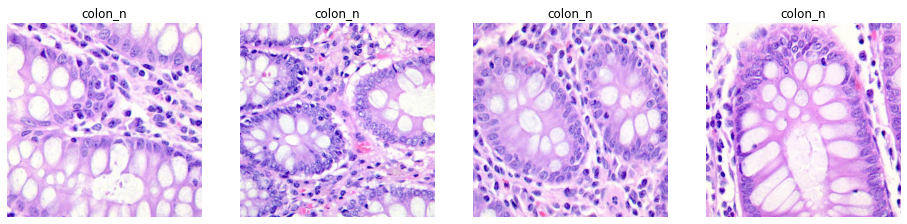

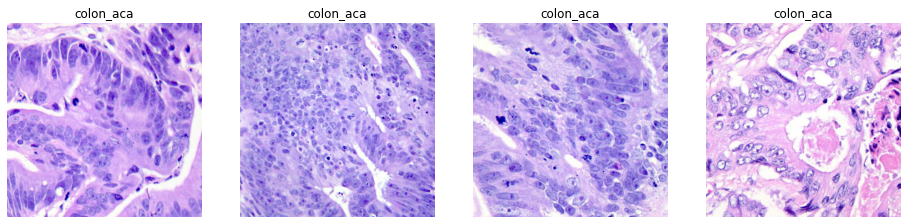

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

colon_n_dir=os.path.join('/content/model_cell_images/train/colon_n')
colon_aca_dir=os.path.join('/content/model_cell_images/train/colon_aca')

colon_n_image = os.listdir(colon_n_dir)
colon_aca_image = os.listdir(colon_aca_dir)

fname1 = [os.path.join(colon_n_dir,fname)
        for fname in colon_n_image[:4]]

fname2 = [os.path.join(colon_aca_dir,fname)
        for fname in colon_aca_image[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('colon_n')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('colon_aca')
    plt.imshow(img)
    
plt.show()

In [14]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [15]:
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [16]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (7000, 250, 250, 3)
Train Label =  (7000,)
Validation Data =  (3000, 250, 250, 3)
Validation Label =  (3000,)


In [17]:
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [242 252 246]
Data setelah di-normalisasi  [0.9490196 0.9882353 0.9647059]


In [18]:
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

Label sebelum di-encoder  ['colon_aca' 'colon_aca' 'colon_aca' 'colon_aca' 'colon_aca' 'colon_aca'
 'colon_aca' 'colon_aca' 'colon_aca' 'colon_aca']


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPooling2D

model = Sequential()

model.add(InputLayer(input_shape=[250,250,3]))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(GlobalMaxPooling2D(data_format='channels_last'))
model.add(Flatten())

In [20]:
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       7

In [22]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
H = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

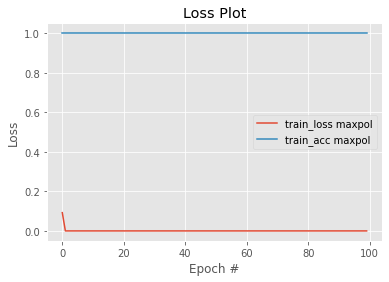

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss maxpol")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc maxpol")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout

# Feature Extraction Layer
model2 = Sequential()

model2.add(InputLayer(input_shape=[250,250,3]))
model2.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(Dropout(0.25))
model2.add(Flatten())

In [ ]:
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 250, 250, 16)      448       
_________________________________________________________________
batch_normalization_3 (Batch (None, 250, 250, 16)      64        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
batch_normalization_4 (Batch (None, 125, 125, 32)      128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 63, 63, 64)       

In [ ]:
model2.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
H2 = model2.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
19/19 [==============================] - 4s 152ms/step - loss: 0.0533 - acc: 0.9769 - val_loss: 16.2179 - val_acc: 0.0000e+00
Epoch 2/100
19/19 [==============================] - 2s 93ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 75.0794 - val_acc: 0.0000e+00
Epoch 3/100
19/19 [==============================] - 2s 94ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 123.0920 - val_acc: 0.0000e+00
Epoch 4/100
19/19 [==============================] - 2s 93ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 159.2809 - val_acc: 0.0000e+00
Epoch 5/100
19/19 [==============================] - 2s 92ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 185.1931 - val_acc: 0.0000e+00
Epoch 6/100
19/19 [==============================] - 2s 93ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 201.1386 - val_acc: 0.0000e+00
Epoch 7/100
19/19 [==============================] - 2s 92ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 207.6913 - val_acc: 0.0000e+00
Epoch 8/100

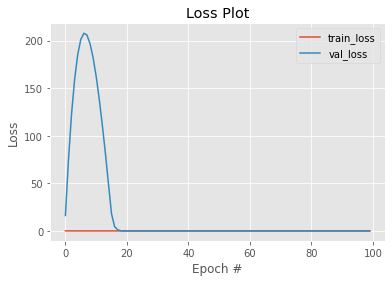

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H2.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H2.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

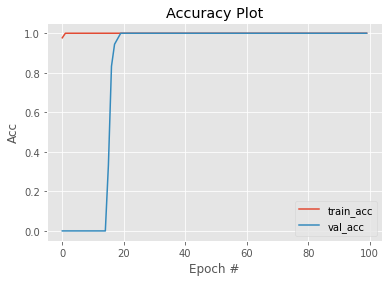

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H2.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H2.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
pred2 = model2.predict(x_val)
labels2 = (pred2 > 0.5).astype(np.int)

print(classification_report(y_val, labels2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [ ]:
model.save('drive/MyDrive/MLModule/BatchNormModel.h5')
model2.save('drive/MyDrive/MLModule/DropoutModel.h5')

Model : BatchNormModel.h5
Predicted Label : cat
Probability : 0.0

Model : DropoutModel.h5
Predicted Label : cat
Probability : 0.0



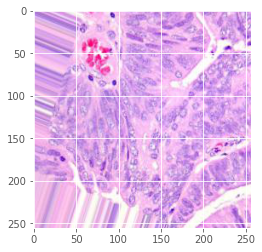

In [ ]:
from PIL import Image

img_upload = Image.open("/content/model_aug/train/_1005_7273957.jpeg")
img_plt = plt.imshow(img_upload)
img = np.array(img_upload)
img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)

model_list = ['drive/MyDrive/MLModule/BatchNormModel.h5','drive/MyDrive/MLModule/DropoutModel.h5']
labels = ['cat', 'dog']

for m in model_list:
    model = load_model(m)
    size_img = model.layers[0].output_shape[1:3]
    imgs = cv2.resize(img, size_img)
    imgs = imgs.astype('float32') / 255
    pred = model.predict(np.expand_dims(imgs, axis=0))[0]
    print('Model :', m.split('/')[-1])
    print('Predicted Label :',labels[((pred > 0.5)+0).ravel()[0]])
    print('Probability :',[ round(elem, 4) for elem in pred ][0])
    print('===============\n')